In [48]:
import glob
import pandas as pd
import numpy as np
from dython.nominal import associations
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     StratifiedKFold, cross_val_score,
                                     train_test_split, cross_validate)
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline

from IPython.core.interactiveshell import InteractiveShell

In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [50]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Cleaning data

In [51]:
train.Age = train.Age.fillna(train.Age.mean())
test.Age = test.Age.fillna(test.Age.mean())

train = train.dropna(subset=['Embarked'])
test = test.dropna(subset=['Embarked'])

## Categorical

In [52]:
train['Male'] = train['Sex'].astype('category').cat.codes
test['Male'] = test['Sex'].astype('category').cat.codes

train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)


In [53]:
drop_columns_test = ['Name', 'Sex', 'Cabin', 'Ticket']
drop_columns_train = drop_columns_test + []

train = train.drop(drop_columns_train, axis=1)
test = test.drop(drop_columns_test, axis=1)

lable = train.pop('Survived')

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
Pclass        889 non-null int64
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Fare          889 non-null float64
Male          889 non-null int8
Embarked_Q    889 non-null uint8
Embarked_S    889 non-null uint8
dtypes: float64(2), int64(3), int8(1), uint8(2)
memory usage: 44.3 KB


# ML

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    train, lable, test_size=2, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [112]:
param_dist = {'objective':'binary:logistic', 'n_jobs': -1}

model = XGBClassifier(**param_dist)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='error',
        verbose=False)

predictions = model.predict(train)
accuracy = round(accuracy_score(lable, predictions)*100, 4)
print ('Accuracy of model is: %.2f%%' % accuracy)

Accuracy of model is: 86.95%


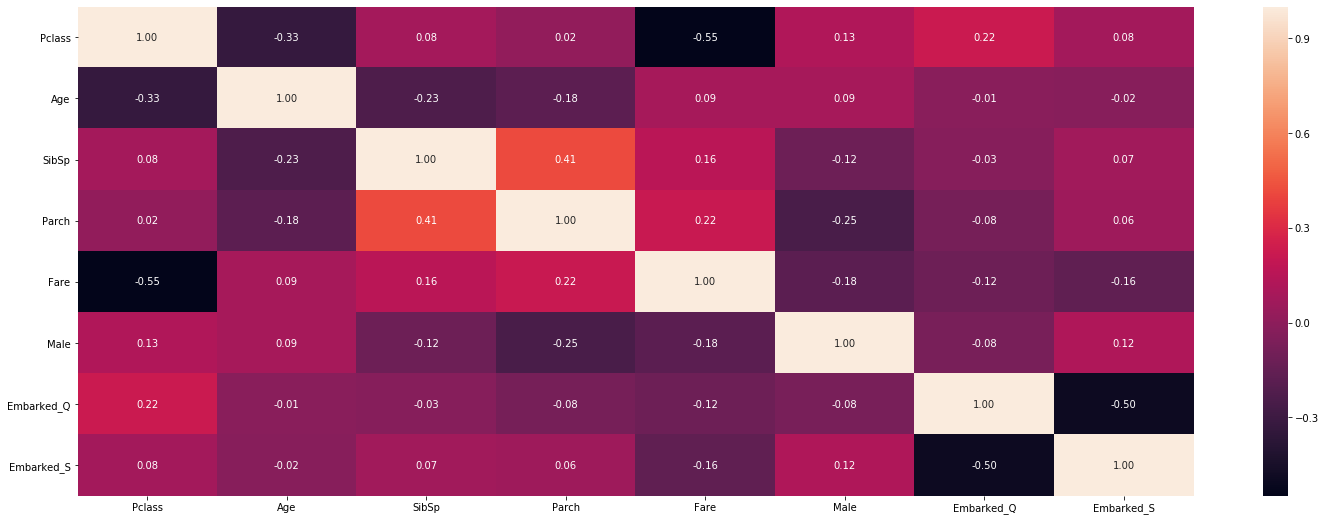

In [77]:
## Correlation
nominal_columns = list(train.select_dtypes(exclude=["number"]).columns)
associations(train,
             nominal_columns=nominal_columns,
             figsize=(25,9),
             theil_u=True)

# Submit

In [76]:
result = model.predict(test)
ids = test.index
submit = pd.DataFrame({'PassengerId':ids,'Survived':result.astype(int)})#.set_index('PassengerId')
submit.to_csv('submit.csv')
print ('Done saving!')
submit.head()

Done saving!


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
